Gini index is a metric for how much a certain batch of your data has mixed classes. If you take a batch of data which is about cats and dogs, and in your batch you only have cats, that is a giniGini index of 0. It is low because it is not very mixed.

In a binary situation like cats vs. dogs, the highest giniGini index would be 0.5, because half the data is cats and half dogs. If you had a batch of data with 10 cats and 10 dogs, that is giniGini index 0.5.

When we know for a fact that a feature such as 'likes cat food' relates specifically to only one class, we can ask a decision-tree splitting question based on that feature (e.g., is that feature 'True' for this particular animal).

That question would take us from having a batch of data with high index (e.g., 10 dogs and 10 cats) to two batches of data with low giniGini (e.g., one batch of data with 10 dogs, and the other batch of data with 10 cats).

In [1]:
import numpy as np

import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import seaborn as sns

#Set seed for reproducibility

np.random.seed(42)

# Generate 100 animals (50 cats, 50 dogs)

n = 100

animals = np.random.choice(["Cat", "Dog"], size=n, p=[0.5, 0.5]) # Target Class: 50% Cats, 50% Dogs

#Adjust the Likes_Walks column based on the animal type

likes_walks = np.where(animals == "Dog", np.where(np.random.rand(n) < 0.97, "Yes", "No"), # 90% dogs like walks

np.where(np.random.rand(n) < 0.03, "Yes", "No")) # 10% cats like walks

#Create the DataFrame

data = pd.DataFrame({

"Animal": animals, # Target Class: 50% Cats, 50% Dogs

"Long_or_Short_Hair": np.random.choice(["Long", "Short"], size=n, p=[0.5, 0.5]), # Mixed for both

"Has_Four_Legs": "Yes", # Always "Yes" (useless split)

"Likes_Walks": likes_walks # Adjusted based on the animal type

})

#Display first 10 rows

print("Cat or Dog Dataset (First 10 Animals)")

print(data.head(10))

Cat or Dog Dataset (First 10 Animals)
  Animal Long_or_Short_Hair Has_Four_Legs Likes_Walks
0    Cat               Long           Yes          No
1    Dog              Short           Yes         Yes
2    Dog              Short           Yes         Yes
3    Dog              Short           Yes         Yes
4    Cat              Short           Yes          No
5    Cat              Short           Yes         Yes
6    Cat              Short           Yes          No
7    Dog               Long           Yes         Yes
8    Dog              Short           Yes         Yes
9    Dog               Long           Yes         Yes


Value counts

Now let’s take a look at the value counts for each feature.

In [2]:
# Distribution of features within each class (Cat or Dog)

print("\nDistribution of Long_or_Short_Hair within each Animal class:")

print(data.groupby("Animal")["Long_or_Short_Hair"].value_counts())

print("\nDistribution of Likes_Walks within each Animal class:")

print(data.groupby("Animal")["Likes_Walks"].value_counts())

print("\nDistribution of Has_Four_Legs within each Animal class:")

print(data.groupby("Animal")["Has_Four_Legs"].value_counts())


Distribution of Long_or_Short_Hair within each Animal class:
Animal  Long_or_Short_Hair
Cat     Short                 32
        Long                  21
Dog     Long                  28
        Short                 19
Name: count, dtype: int64

Distribution of Likes_Walks within each Animal class:
Animal  Likes_Walks
Cat     No             50
        Yes             3
Dog     Yes            46
        No              1
Name: count, dtype: int64

Distribution of Has_Four_Legs within each Animal class:
Animal  Has_Four_Legs
Cat     Yes              53
Dog     Yes              47
Name: count, dtype: int64


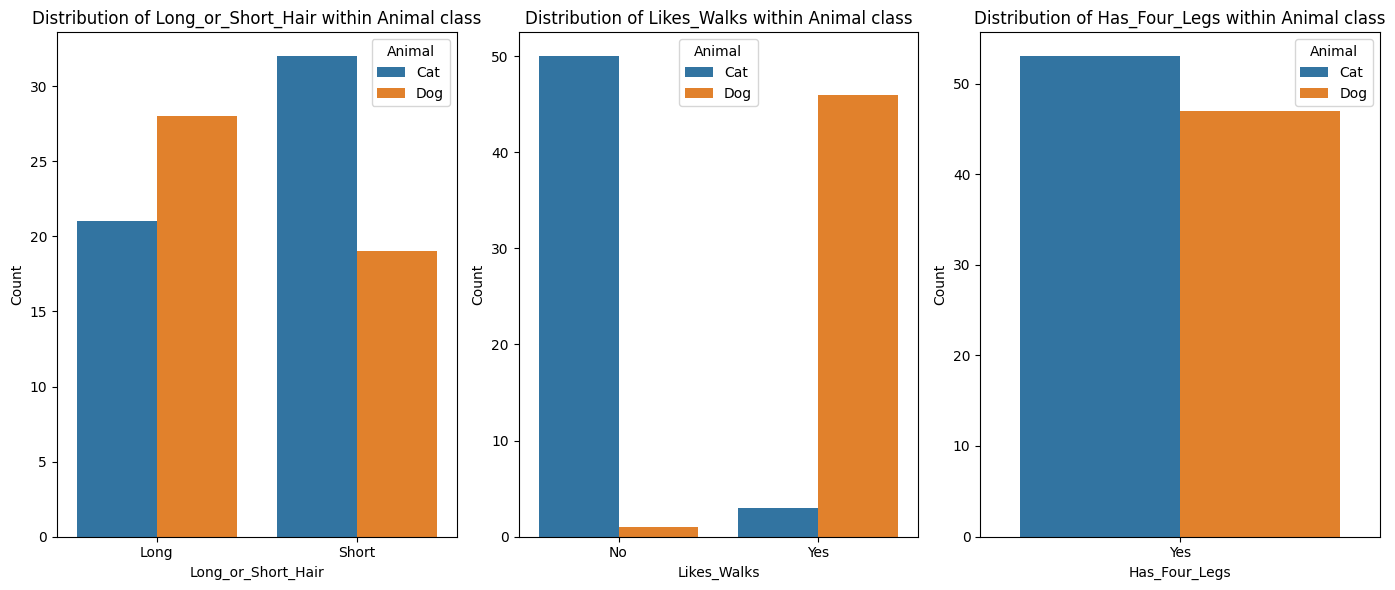

In [ ]:
# Create subplots (side by side)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))  # 1 row, 3 columns

 # Plot the distribution of "Long_or_Short_Hair" within each "Animal" class

sns.countplot(x='Long_or_Short_Hair', hue='Animal', data=data, ax=axes[0])
axes[0].set_title('Distribution of Long_or_Short_Hair within Animal class')
axes[0].set_ylabel('Count')

# Plot the distribution of "Likes_Walks" within each "Animal" class

sns.countplot(x='Likes_Walks', hue='Animal', data=data, ax=axes[1])
axes[1].set_title('Distribution of Likes_Walks within Animal class')
axes[1].set_ylabel('Count')

 

# Plot the distribution of "Likes_Walks" within each "Animal" class

sns.countplot(x='Has_Four_Legs', hue='Animal', data=data, ax=axes[2])
axes[2].set_title('Distribution of Has_Four_Legs within Animal class')
axes[2].set_ylabel('Count')

 

#Display the plots

plt.tight_layout()
plt.show()

A high Gini index question would split the data into two batches of highly mixed classes (e.g., two batches of data where one is half cats and half dogs, and the other is half cats and half dogs). A high Gini for a binary set of data would be 0.5.

A low Gini index question would split the data into two batches of different classes (e.g., half one batch is all cats, the other batch is all dogs). A low Gini would be 0.

In [4]:
def gini(groups, classes):

    """Calculate Gini Index for a given split"""
    total_samples = sum(len(group) for group in groups)
    gini_value = 0.0

    for group in groups:
        size = len(group)
        if size == 0:
            continue

        score = 0.0

        for class_val in classes:
            p = (group.count(class_val) / size) ** 2
            score += p

        gini_value += (1.0 - score) * (size / total_samples)

    return gini_value

#Compute Gini for each feature

features = ["Long_or_Short_Hair", "Likes_Walks", "Has_Four_Legs"]  
classes = ["Cat", "Dog"]


for feature in features:

    print(f"\nGini Index for splits based on {feature}:")

    unique_values = data[feature].unique()

    for value in unique_values:

        groups = [
            list(data[data[feature] == value]["Animal"]),  # Group for this feature value
            list(data[data[feature] != value]["Animal"])  # Group for the other feature value
        ]

        gini_value = gini(groups, classes)

        print(f"- Gini Index for {feature} = {value}: {gini_value:.3f}")


Gini Index for splits based on Long_or_Short_Hair:
- Gini Index for Long_or_Short_Hair = Long: 0.478
- Gini Index for Long_or_Short_Hair = Short: 0.478

Gini Index for splits based on Likes_Walks:
- Gini Index for Likes_Walks = No: 0.076
- Gini Index for Likes_Walks = Yes: 0.076

Gini Index for splits based on Has_Four_Legs:
- Gini Index for Has_Four_Legs = Yes: 0.498


A high Gini index question would split the data into two batches of highly mixed classes (e.g., two batches of data where one is half cats and half dogs, and the other is half cats and half dogs). A high Gini for a binary set of data would be 0.5.

A low Gini index question would split the data into two batches of different classes (e.g., half one batch is all cats, the other batch is all dogs). A low Gini would be 0.

   Animal  Long_or_Short_Hair Has_Four_Legs  Likes_Walks
0       0                   0           Yes            0
1       1                   1           Yes            1
2       1                   1           Yes            1
3       1                   1           Yes            1
4       0                   1           Yes            0
5       0                   1           Yes            1
6       0                   1           Yes            0
7       1                   0           Yes            1
8       1                   1           Yes            1
9       1                   0           Yes            1

Gini Index for Long_or_Short_Hair:
Root node (before split) Gini: 0.498
Child node 1 Gini: 0.490
Child node 2 Gini: 0.468
Decision Tree using Long_or_Short_Hair: Accuracy = 0.60


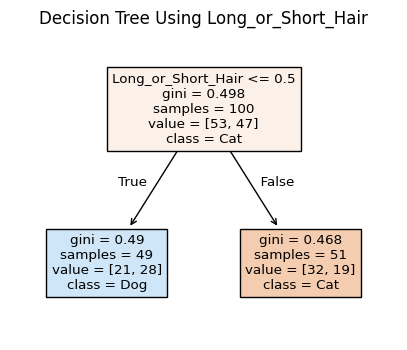


Gini Index for Likes_Walks:
Root node (before split) Gini: 0.498
Child node 1 Gini: 0.038
Child node 2 Gini: 0.115
Decision Tree using Likes_Walks: Accuracy = 0.96


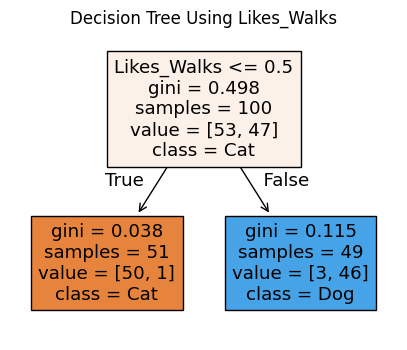

In [5]:
#Encode categorical features using LabelEncoder

le = LabelEncoder()

 

# Encode the 'Long_or_Short_Hair' and 'Likes_Walks' features

data['Long_or_Short_Hair'] = le.fit_transform(data['Long_or_Short_Hair'])

data['Likes_Walks'] = le.fit_transform(data['Likes_Walks'])

 

# Encode the target variable (Animal)

data['Animal'] = le.fit_transform(data['Animal'])  # Target: 0 = Cat, 1 = Dog

 

#Display the first few rows to check encoding

print(data.head(10))

 

#Train decision trees using different features separately

for feature in ["Long_or_Short_Hair", "Likes_Walks"]:

    X = data[[feature]]  # Only use one feature for each model

    y = data["Animal"]  # Target variable: Animal (Cat = 0, Dog = 1)

   

    tree = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=42)

    tree.fit(X, y)

   

    # Print Gini index for the root node and the child node(s)

    print(f"\nGini Index for {feature}:")

    print(f"Root node (before split) Gini: {tree.tree_.impurity[0]:.3f}")

    for i in range(1, len(tree.tree_.impurity)):  # Skip the root node

        print(f"Child node {i} Gini: {tree.tree_.impurity[i]:.3f}")

   

    y_pred = tree.predict(X)

    accuracy = accuracy_score(y, y_pred)

   

    print(f"Decision Tree using {feature}: Accuracy = {accuracy:.2f}")

   

    # Visualize the decision tree

    plt.figure(figsize=(5, 4))

    plot_tree(tree, feature_names=[feature], class_names=le.classes_, filled=True)

    plt.title(f"Decision Tree Using {feature}")

    plt.show()